# Data Wrangling Template

## Gather

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import json
import re
%matplotlib inline

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split("/")[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)
img_prediction_df = pd.read_csv('image-predictions.tsv',sep="\t")

In [4]:
twitter_api_list = []
with open('tweet-json.txt','r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favourite = tweets['favorite_count']
        twitter_api_list.append({'tweet_id':tweet_id,
                                'retweet_count':retweet_count,
                                'favorite_count':favourite})
api_df = pd.DataFrame(twitter_api_list)

## Assess

In [5]:
archive_df.head(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [119]:
archive_df['rating_denominator'].value_counts()
invalid_denom = archive_df['rating_denominator'] != 10
archive_denom = archive_df[invalid_denom]
archive_denom

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [7]:
archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
archive_df.groupby('name').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
name,,,,,,,,,,,,,,,,
Abby,2,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2
Ace,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Acro,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Adele,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Aiden,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
such,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
the,8,0,0,8,8,8,0,0,0,8,8,8,8,8,8,8
this,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1


In [13]:
img_prediction_df.head(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
img_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
api_df.head(25)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [20]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Quality issues
## archive_df table:
    1- existence of missing values - NaN
    2- tweet_id, in_reply_to_status_id, in_reply_to_user_id columns,retweeted_status_id, retweeted_status_user_id type should be string
    3- timestamp column, retweet_status_timestamp coulmns should be DateTime
    4- rating_denominator column conatin inconsistent values like (0)
    5- name column and classification columns contain 'None' value as string
    6- name coulmn contains non-meaningful/incomplete names such as 'a, the, such, very, this, ...'
    7- extra records as some tweet_id has no images or is the same as retweets
## img_prediction_df table:
    1- tweet_id column type shouls be string
## api_df table:
    1- tweet_id column type shouls be string
    
# Tidiness issues:
## archive_df table:
    1- the four classifications coulmns names are not descriptive
## img_prediction_df table:
    1- some columns names are not descriptive - p1, p1_conf, p2, ....
## api_df table:
    1- api_df table has the same observation as archive_df table, so better to be merged

## Clean

In [121]:
archive_df_clean = archive_df.copy()
img_prediction_df_clean = img_prediction_df.copy()
api_df_clean = api_df.copy()

#### Define
1-expanded_url in archive with NaN value means it has no image, so we need to remove the entire row from the archive dataframe

#### Code

In [122]:
archive_df_clean = archive_df_clean[archive_df_clean['expanded_urls'].notna()]

#### Test

In [123]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        2297 non-null   object 
 13  doggo                       2297 

#### Define
2- remove tweet_id rows that doesn't exist in img_prediction table

#### Code

In [124]:
tweets_with_img = list(img_prediction_df_clean['tweet_id'].unique())

len(tweets_with_img) == archive_df_clean.tweet_id.isin(tweets_with_img).sum()

archive_df_clean = archive_df_clean[archive_df_clean['tweet_id'].isin(tweets_with_img)]

#### Test

In [125]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

#### Define
3-remove retweets and replies from original tweets columns

#### Code

In [126]:
retweet_entries = archive_df_clean['retweeted_status_id'].notnull()
archive_df_clean = archive_df_clean[~retweet_entries]

replies_entries = archive_df_clean['in_reply_to_status_id'].notnull()
archive_df_clean = archive_df_clean[~replies_entries]

archive_df_clean = archive_df_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                                          'in_reply_to_status_id','in_reply_to_user_id'],axis=1)

#### Test

In [127]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


#### Define
4-convert the None string into empty string then combine the four columns into 1 column

#### Code

In [128]:
archive_df_clean['doggo'].replace('None', "", inplace=True)
archive_df_clean['floofer'].replace('None', "", inplace=True)
archive_df_clean['pupper'].replace('None', "", inplace=True)
archive_df_clean['puppo'].replace('None', "", inplace=True)

archive_df_clean['dog_breed'] = archive_df_clean['doggo'] + archive_df_clean['floofer'] + archive_df_clean['pupper'] + archive_df_clean['puppo'] 
archive_df_clean = archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis=1)

archive_df_clean.loc[archive_df_clean.dog_breed == 'doggopupper', 'dog_breed'] = 'doggo-pupper'
archive_df_clean.loc[archive_df_clean.dog_breed == 'doggopuppo', 'dog_breed'] = 'doggo-puppo'
archive_df_clean.loc[archive_df_clean.dog_breed == 'doggofloofer', 'dog_breed'] = 'doggo-floofer'
archive_df_clean.loc[archive_df_clean.dog_breed == '', 'dog_breed'] = np.nan

#### Test

In [129]:
archive_df_clean['dog_breed'].value_counts()

pupper           201
doggo            63 
puppo            22 
doggo-pupper     8  
floofer          7  
doggo-floofer    1  
doggo-puppo      1  
Name: dog_breed, dtype: int64

In [130]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   dog_breed           303 non-null    object
dtypes: int64(3), object(6)
memory usage: 154.0+ KB


#### Define
5-api table should be part pf archive table

#### Code

In [131]:
archive_df_clean = pd.merge(archive_df_clean, api_df_clean, on=['tweet_id'], how='left')

#### Test

In [132]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   dog_breed           303 non-null    object
 9   retweet_count       1971 non-null   int64 
 10  favorite_count      1971 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 184.8+ KB


#### Define
6- tweet_id columns should be string not integer
    timestamps columns should be date not string

#### Code

In [133]:
archive_df_clean['tweet_id'] = archive_df_clean['tweet_id'].astype(str)
archive_df_clean['timestamp'] = pd.to_datetime(archive_df_clean['timestamp'])

img_prediction_df_clean['tweet_id'] = img_prediction_df_clean['tweet_id'].astype(str)

#### Test

In [134]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_breed           303 non-null    object             
 9   retweet_count       1971 non-null   int64              
 10  favorite_count      1971 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 184.8+ KB


In [135]:
archive_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,9774,41048


### define
7- replce inconsistent values in name column with the right name after extracting it from text column or replacing it with NaN

### code

In [136]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_df_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('an', c_name)
        elif row['name'] == 'very':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('very', c_name)
        elif row['name'] == 'the':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('the', c_name)
        elif row['name'] == 'this':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('this', c_name)
        elif row['name'] == 'such':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('such', c_name)
        elif row['name'] == 'None':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_df_clean.loc[index,'name'] = archive_df_clean.loc[index,'name'].replace('None', c_name)
    except IndexError:
        archive_df_clean.loc[index,'name'] = np.nan

            
archive_df_clean['name'].value_counts(dropna = False)

NaN        569
Charlie    11 
Cooper     10 
Lucy       10 
Oliver     10 
           .. 
Fizz       1  
Tove       1  
Ricky      1  
Timofy     1  
Baron      1  
Name: name, Length: 953, dtype: int64

### test

In [137]:
archive_df_clean.tail(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count
1921,666835007768551424,2015-11-18 04:27:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1,https://twitter.com/dog_rates/status/666835007768551424/photo/1,10,10,NaN,NaN,83,222
1922,666826780179869698,2015-11-18 03:54:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 simply brilliant pup https://t.co/V6ZzG45zzG,https://twitter.com/dog_rates/status/666826780179869698/photo/1,12,10,NaN,NaN,105,266
1923,666817836334096384,2015-11-18 03:18:55+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeph. He is a German Boston Shuttlecock. Enjoys couch. Lost body during French Revolution. True hero 9/10 https://t.co/8whlkYw3mO,https://twitter.com/dog_rates/status/666817836334096384/photo/1,9,10,Jeph,NaN,267,540
1924,666804364988780544,2015-11-18 02:25:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK,https://twitter.com/dog_rates/status/666804364988780544/photo/1,8,10,Jockson,NaN,95,250
1925,666786068205871104,2015-11-18 01:12:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S,https://twitter.com/dog_rates/status/666786068205871104/photo/1,2,10,NaN,NaN,521,800
1926,666781792255496192,2015-11-18 00:55:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa,https://twitter.com/dog_rates/status/666781792255496192/photo/1,10,10,Octaviath,NaN,211,404
1927,666776908487630848,2015-11-18 00:36:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Josep. He is a Rye Manganese mix. Can drive w eyes closed. Very irresponsible. Menace on the roadways. 5/10 https://t.co/XNGeDwrtYH,https://twitter.com/dog_rates/status/666776908487630848/photo/1,5,10,Josep,NaN,186,368
1928,666739327293083650,2015-11-17 22:06:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10,10,Lugan,NaN,71,244
1929,666701168228331520,2015-11-17 19:35:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB,https://twitter.com/dog_rates/status/666701168228331520/photo/1,8,10,Johm,NaN,234,449
1930,666691418707132416,2015-11-17 18:56:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,https://twitter.com/dog_rates/status/666691418707132416/photo/1,8,10,Christoper,NaN,51,196


### define
8- replce inconsistent values in numerator columns with the right name after extracting it from text column

### code

In [138]:
invalid_deno = archive_df_clean.query('rating_denominator != 10')
pd.set_option("display.max_colwidth",0)
invalid_deno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 320 to 1950
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            17 non-null     object             
 1   timestamp           17 non-null     datetime64[ns, UTC]
 2   source              17 non-null     object             
 3   text                17 non-null     object             
 4   expanded_urls       17 non-null     object             
 5   rating_numerator    17 non-null     int64              
 6   rating_denominator  17 non-null     int64              
 7   name                3 non-null      object             
 8   dog_breed           0 non-null      object             
 9   retweet_count       17 non-null     int64              
 10  favorite_count      17 non-null     int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 1.6+ KB


In [139]:
archive_df_clean['rating_numerator'] = archive_df_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')
archive_df_clean['rating_denominator'] = archive_df_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')

# Calculating the dogs counts in the tweets featuring many dogs
dog_count = archive_df_clean.rating_numerator[archive_df_clean.rating_numerator >= 40 ]/10

# Check the dog_count with their indices:
#print(dog_count)

# Performing the Calculations
archive_df_clean.loc[archive_df_clean.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [archive_df_clean.rating_numerator[archive_df_clean.rating_numerator >= 40]/dogs_count , 10]

C:\Users\Nanna\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [140]:
archive_df_clean['rating_numerator'].value_counts(), archive_df_clean['rating_denominator'].value_counts()

(12.00    446
 10.00    431
 11.00    392
 13.00    253
 9.00     150
 8.00     95 
 7.00     52 
 14.00    33 
 5.00     32 
 6.00     32 
 3.00     19 
 4.00     16 
 2.00     9  
 1.00     5  
 13.50    1  
 11.27    1  
 0.00     1  
 24.00    1  
 11.26    1  
 9.75     1  
 Name: rating_numerator, dtype: int64,
 12.00    446
 10.00    431
 11.00    392
 13.00    253
 9.00     150
 8.00     95 
 7.00     52 
 14.00    33 
 5.00     32 
 6.00     32 
 3.00     19 
 4.00     16 
 2.00     9  
 1.00     5  
 13.50    1  
 11.27    1  
 0.00     1  
 24.00    1  
 11.26    1  
 9.75     1  
 Name: rating_denominator, dtype: int64)

### define
9- remove extra rows from img_prediction table

### code

In [151]:
img_prediction_df_clean = img_prediction_df_clean[~np.logical_not(img_prediction_df_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))]

### test

In [152]:
img_prediction_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      1971 non-null   object 
 1   jpg_url       1971 non-null   object 
 2   img_num       1971 non-null   int64  
 3   prediction_1  1971 non-null   object 
 4   confidence_1  1971 non-null   float64
 5   breed_1       1971 non-null   bool   
 6   prediction_2  1971 non-null   object 
 7   confidence_2  1971 non-null   float64
 8   breed_2       1971 non-null   bool   
 9   prediction_3  1971 non-null   object 
 10  confidence_3  1971 non-null   float64
 11  breed_3       1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


### define
10- restructuring the img_prediction columns (p1, p1_conf, p2, .....)

### code

In [154]:
img_prediction_df_clean
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
img_prediction_df_clean.columns = cols
img_prediction_df_clean = pd.wide_to_long(img_prediction_df_clean, stubnames=['prediction', 'confidence', 'breed'], 
                                           i=['tweet_id', 'jpg_url', 'img_num'], j='algorithm', sep='_',)
img_prediction_df_clean

prediction  \
tweet_id           jpg_url                                         img_num algorithm                           
666020888022790149 https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg 1       1          Welsh_springer_spaniel   
                                                                           2          collie                   
                                                                           3          Shetland_sheepdog        
666029285002620928 https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg 1       1          redbone                  
                                                                           2          miniature_pinscher       
...                                                                                       ...                  
892177421306343426 https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg 1       2          Pekinese                 
                                                                           3          papillon                 
892420643555336193 https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg 1       1          orange                   
                                                                           2          bagel                    
                                                                           3          banana                   

                                                                                      confidence  \
tweet_id           jpg_url                                         img_num algorithm               
666020888022790149 https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg 1       1          0.465074     
                                                                           2          0.156665     
                                                                           3          0.061428     
666029285002620928 https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg 1       1          0.506826     
                                                                           2          0.074192     
...                                                                                        ...     
892177421306343426 https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg 1       2          0.090647     
                                                                           3          0.068957     
892420643555336193 https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg 1       1          0.097049     
                                                                           2          0.085851     
                                                                           3          0.076110     

                                                                                      breed  
tweet_id           jpg_url                                         img_num algorithm         
666020888022790149 https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg 1       1          True   
                                                                           2          True   
                                                                           3          True   
666029285002620928 https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg 1       1          True   
                                                                           2          True   
...                                                                                    ...   
892177421306343426 https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg 1       2          True   
                                                                           3          True   
892420643555336193 https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg 1       1          False  
                                                                           2          False  
                                                                           3          False  

[5913 rows x 3 columns]

In [155]:
archive_df_clean.to_csv('twitter_archive_master.csv', index=False)
img_prediction_df_clean.to_csv('image_prediction_master.csv', index=False)

### insights

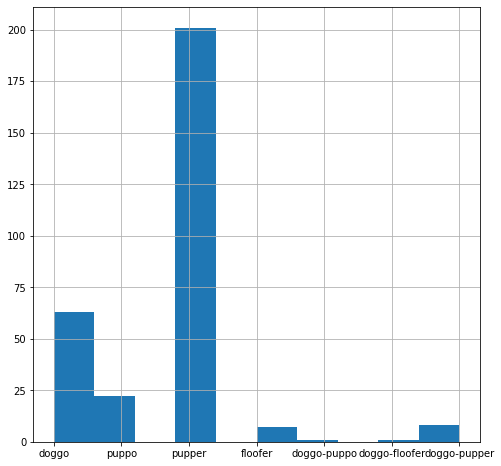

In [162]:
archive_df_clean['dog_breed'].hist(figsize=(8,8));

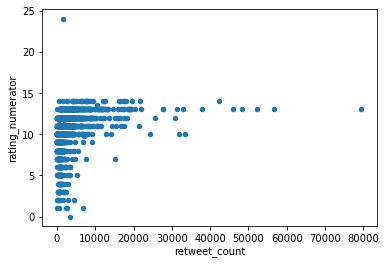

In [163]:
x1 = archive_df_clean.plot(x='retweet_count',y='rating_numerator', kind='scatter')